# > Проект

Стартап, который создает новый маркетплейс и занимается продажей новых товаров из Бразилии

# Задачи проекта

1. Оценить месячный retention в оформление заказа с помощью когортного анализа.
2. Определить, существует ли product/market fit у этого маркетплейса.
3. Определить 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.
4. Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.
5. Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.
6. Сформулировать выводы о проделанной работе. 

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from operator import attrgetter
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.ticker import MultipleLocator

In [5]:
# Cчитываем данные
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ahmad-eldarov-gwr9-083c1/Olist/olist_customers_dataset.csv')
order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ahmad-eldarov-gwr9-083c1/Olist/olist_order_items_dataset.csv')
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ahmad-eldarov-gwr9-083c1/Olist/olist_orders_dataset.csv')

In [6]:
# Создаем копии
customers_copy = customers.copy()
order_items_copy = order_items.copy()
orders_copy = orders.copy()

In [7]:
customers_copy.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
order_items_copy.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
orders_copy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# Приводим время покупки в формат datetime
orders_copy['order_purchase_timestamp'] = pd.to_datetime(orders_copy['order_purchase_timestamp'])
# Создадим новый столбец с датой покупки в формате Year-month для визуализации в хронологическом порядке
orders_copy['order_year_month'] = orders_copy['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m'))

# Задача 1. Оценить месячный retention в оформление заказа с помощью когортного анализа.


1. Исследовать датасет и определить, какой вид заказа будет учитываться в retention
2. Построить месячный retention
3. Проанализировать, чему равен медианный retention 1-го месяца (т.е. взять retention 1-ого месяца для всех когорт и посчитать по этим числам медиану)
4. Найти когорту с самым высоким retention на 3-й месяц.

In [11]:
# Определяем какой вид заказа будем учитывать в retention
orders_copy['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


В retention целесообразней учитывать вид заказа со статусом "delivered". Остальные виды не совсем подходят.
Например "shipped" не показывает успешность заказа, так как клиент может вернуть заказ.

In [12]:
# Выбираем заказы со статусом delivered
delivered_orders = orders_copy.query('order_status == "delivered"')

In [13]:
# Создаем новый датафрейм с уникальным id
cohorts_df = delivered_orders.merge(customers_copy, how='left', on='customer_id') \
                 [['customer_unique_id', 'order_purchase_timestamp']]
cohorts_df.head()

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39


In [14]:
# Извлекаем месяц и день заказа
cohorts_df['order_month'] = cohorts_df['order_purchase_timestamp'].dt.to_period('M')
cohorts_df['order_day'] = cohorts_df['order_purchase_timestamp'].dt.to_period('D')
cohorts_df.head()

,customer_unique_id,order_purchase_timestamp,order_month,order_day
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,2017-10-02
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07,2018-07-24
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08,2018-08-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11-18
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02,2018-02-13


In [15]:
# Присваиваем когорты на основе даты первого заказа
cohorts_df['cohort'] = cohorts_df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
cohorts_df['cohort_day'] = cohorts_df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')
# Присваиваем месячные периоды
cohorts_df['period_number_month'] = np.floor((cohorts_df.order_day - cohorts_df.cohort_day).apply(attrgetter('n')) / 30)


In [16]:
cohorts_df.head()

,customer_unique_id,order_purchase_timestamp,order_month,order_day,cohort,cohort_day,period_number_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,2017-10-02,2017-09,2017-09-04,0.0
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07,2018-07-24,2018-07,2018-07-24,0.0
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08,2018-08-08,2018-08,2018-08-08,0.0
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11-18,2017-11,2017-11-18,0.0
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02,2018-02-13,2018-02,2018-02-13,0.0


In [17]:
## Агрегируем данные по когортам и месячному периоду
cohorts_df = cohorts_df.groupby(['period_number_month', 'cohort']) \
    .agg(n_customers=('customer_unique_id', 'nunique'))

In [18]:
cohorts_df.head()

n_customers
period_number_month cohort              
0.0                 2016-09            1
                    2016-10          262
                    2016-12            1
                    2017-01          717
                    2017-02         1628

In [19]:
# Создаем сводную таблицу для когортного анализа
cohorts_pivot = cohorts_df.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

# Рассчитываем размеры когорт
cohorts_size = cohorts_pivot.iloc[:, 0]

# Вычисляем retention rate (Делим значения в таблице на размер когорты в 1м столбце)
retention_rate = cohorts_pivot.divide(cohorts_size, axis=0)

In [20]:
#Смотрим на retention в абсолютных значениях
cohorts_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Смотрим на retention в долях
retention_rate

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Смотрим на описательные характеристики, чтобы выяснить медианный retention за первый месяц
retention_rate.describe().round(4)

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
count,23.0,19.0000,17.0000,17.0000,16.0000,15.0000,15.0000,13.0000,11.0000,11.0000,...,10.0000,7.0000,8.0000,5.0000,6.0000,4.0000,4.0000,2.0000,1.0000,1.0000
mean,1.0,0.0036,0.0029,0.0026,0.0024,0.0022,0.0025,0.0020,0.0018,0.0023,...,0.0027,0.0016,0.0020,0.0017,0.0017,0.0014,0.0023,0.0045,0.0038,0.0038
std,0.0,0.0014,0.0013,0.0013,0.0009,0.0014,0.0009,0.0011,0.0008,0.0009,...,0.0015,0.0012,0.0011,0.0008,0.0013,0.0010,0.0013,0.0044,NaN,NaN
min,1.0,0.0010,0.0009,0.0004,0.0009,0.0004,0.0009,0.0006,0.0007,0.0003,...,0.0002,0.0006,0.0009,0.0009,0.0006,0.0006,0.0008,0.0014,0.0038,0.0038
25%,1.0,0.0029,0.0018,0.0019,0.0016,0.0014,0.0025,0.0012,0.0013,0.0019,...,0.0016,0.0009,0.0011,0.0012,0.0008,0.0008,0.0016,0.0030,0.0038,0.0038
50%,1.0,0.0035,0.0027,0.0024,0.0024,0.0019,0.0027,0.0018,0.0015,0.0025,...,0.0027,0.0016,0.0019,0.0013,0.0010,0.0010,0.0023,0.0045,0.0038,0.0038
75%,1.0,0.0042,0.0037,0.0035,0.0031,0.0027,0.0029,0.0025,0.0025,0.0027,...,0.0036,0.0017,0.0028,0.0020,0.0024,0.0016,0.0030,0.0061,0.0038,0.0038
max,1.0,0.0067,0.0052,0.0056,0.0038,0.0053,0.0038,0.0044,0.0032,0.0038,...,0.0056,0.0042,0.0038,0.0028,0.0038,0.0028,0.0038,0.0076,0.0038,0.0038


Проанализировав таблицу retention_rate и ее характериситики, определили, что:
1. Медианный retention 1-го месяца **= 0.35%**
2. Когорта с самым высоким retention на 3-й месяц - `'2017-01'` **= 0.56%**

# Задача 2. Определить, существует ли product/market fit у маркетплейса.

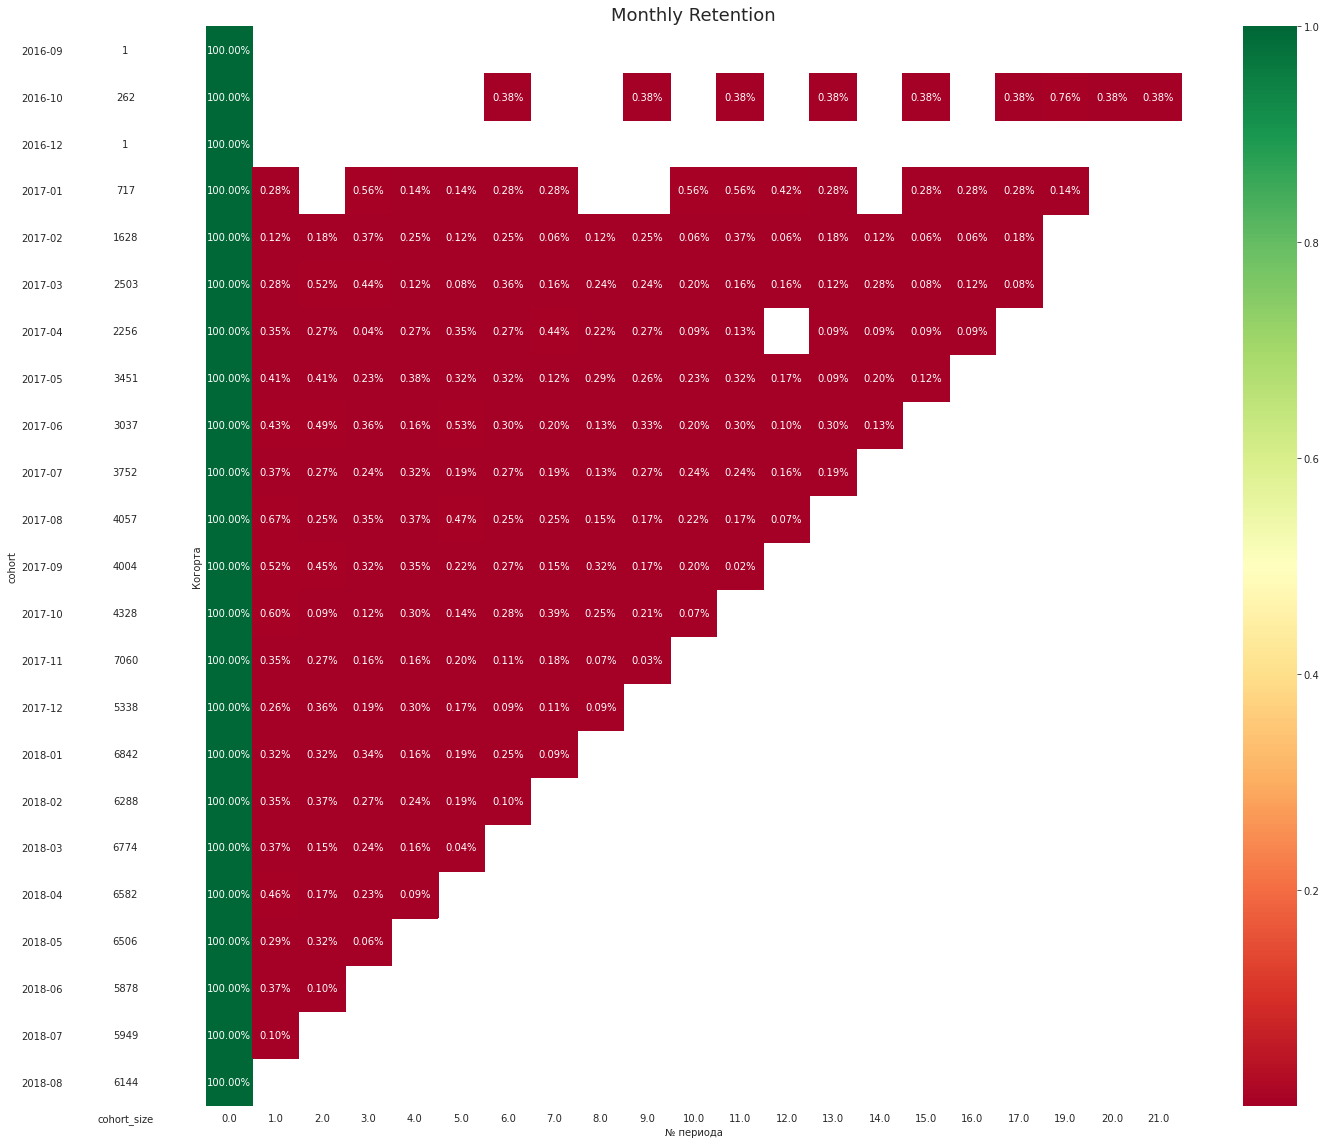

In [23]:
# Строим тепловую карту когортного анализа для наглядности
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 16), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_rate,
                mask=retention_rate.isnull(),
                annot=True,
                fmt='.2%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=18)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohorts_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

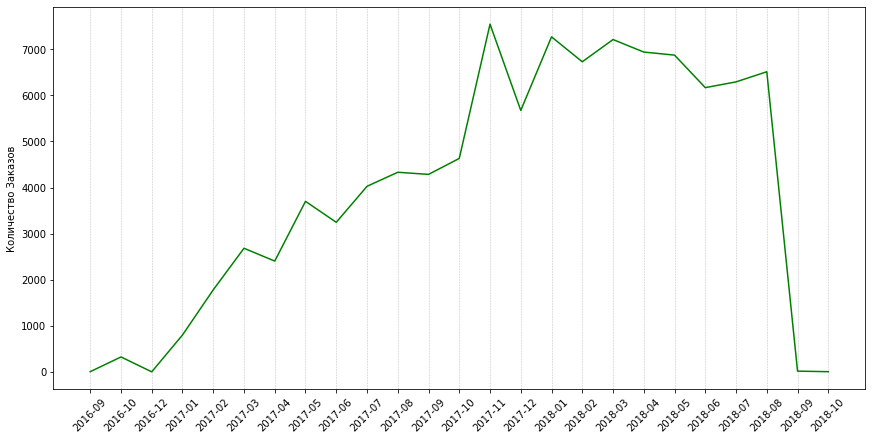

In [24]:
#Для общего понимания, выведем график общих продаж по дате
#Строим график
fig = plt.figure(constrained_layout=True, figsize=(12, 6))
sns.lineplot(data=orders_copy['order_year_month'].value_counts().sort_index(), 
             color='green')
plt.xticks(rotation=45)
plt.ylabel('Количество Заказов')
plt.grid(axis='x', linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.show()

Исходя из данных полученных когортным анализом, мы выяснили что retention rate довольно низкий (ниже 1% по всем когортам)

График общих продаж показывает, что они растут с каждым месяцем, что говорит о том, что приток новых клиентов большой, но они практически не совершают повторных покупок спустя месяцы.

Низкий retention rate означает, что продукт либо не решает значимые проблемы целевой аудитории, либо не предоставляет достаточно ценности, чтобы удержать пользователей.

**Следовательно, делаем вывод о том, что у продукта отсутствует PMF (Product/Market Fit)**

Причины отсутствия PMF у данного маркетплейса могут быть разные:
1. Логистические проблемы (например, долгая доставка заказа)
2. Высокая конкуренция
3. Проблемы в оформлении заказа (например, выбор способов оплаты или трудный процесс оформления заказа)
4. Скудный выбор товаров
5. Плохой маркетинг

Для точной причины, у нас недостаточно данных.
Исходя из тех данных, которые у нас есть, мы можем взглянуть на время доставки товара.

Проверим, может быть заказы доставляются с задержкой?


In [25]:
#Воспользуемся датой только с успешными заказами, оставим в ней нужные нам столбцы
delivered_orders = \
delivered_orders[[
                "order_id",'order_approved_at','order_delivered_customer_date',
                'order_estimated_delivery_date','order_year_month'
                ]]

In [26]:
delivered_orders.head()

,order_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_year_month
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02


In [27]:
# Переведем все даты в формат datetime
delivered_orders['order_approved_at'] = pd.to_datetime(delivered_orders['order_approved_at'])
delivered_orders['order_delivered_customer_date'] = pd.to_datetime(delivered_orders['order_delivered_customer_date'])
delivered_orders['order_estimated_delivery_date'] = pd.to_datetime(delivered_orders['order_estimated_delivery_date'])

In [28]:
#Для удобства
df = delivered_orders

In [29]:
#Cоздаем новый столбец, в котором будет указано количество дней ушедших на доставку после оплаты заказа
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.days

#Еще один столбец, где покажем, доставка была вовремя(Yes) или с опозданием (No)
df['delivery_estimated'] = df['order_delivered_customer_date'] <= df['order_estimated_delivery_date']
df['delivery_estimated'] = df['delivery_estimated'].replace({True: 'Yes', False: 'No'})


In [30]:
df.head()

,order_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_year_month,delivery_time,delivery_estimated
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2017-10,8.0,Yes
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,2018-07,12.0,Yes
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,2018-08,9.0,Yes
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,2017-11,13.0,Yes
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2018-02,2.0,Yes


In [31]:
df.describe()

,delivery_time
count,96456.000000
mean,11.642459
std,9.520355
min,-7.000000
25%,6.000000
50%,9.000000
75%,15.000000
max,208.000000


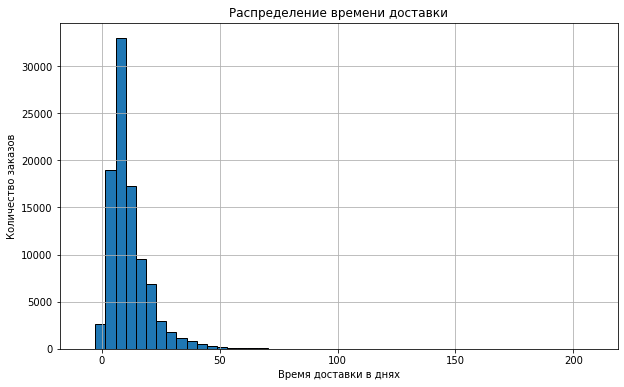

In [32]:
# Построим гистограмму для распределения времени доставки
plt.figure(figsize=(10, 6))
plt.hist(df['delivery_time'], bins=50, edgecolor='black')
plt.title('Распределение времени доставки')
plt.xlabel('Время доставки в днях')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

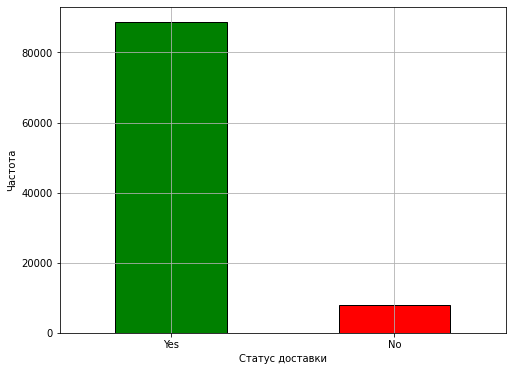

In [33]:
#Построим plot для сравнения количество заказов доставленных вовремя и опоздавших заказов
plt.figure(figsize=(8, 6))
df['delivery_estimated'].value_counts().plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.xlabel('Статус доставки')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

***Проанализировав количество дней на доставку и заказы доставленные вовремя, мы видим, что это не является причиной отсутствия PMF.***

***Соответственно у нас мало данных, для установления причины отсутствия PMF***

***Маркетплейс должен сконцентрироваться на повышении retention rate (удержании клиентов), для этого нужно:***
1. Анализ потребностей конкретного сегмента аудитории.
2. Оптимизация пользовательского опыта. (например, сделать процесс покупки маскимально удобным и быстрым)
3. Улучшить качество продукции и разнообразие ассортимента.
4. Определить и реализовать стратегию по удержанию клиентов. (мотивировать клиентов совершать новые покупки)
5. Маркетинг.

# Задача 3. Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

Для данного продукта выделим 5 основным метрик

***1. Доход маркетплейса. (Revenue)***

***2. Количество уникальных активных пользователей в месяц. (MAU)***

***3. Количество новых клиентов. (New Customers)***

***4. Среднее количество заказов на клиента. (AAPU)***

***5. Средняя выручка на клиента. (ARPU)***

1. Найдем revenue

In [34]:
#Соединияем 2 датафрейма
price_orders = pd.merge(orders_copy, order_items, on='order_id', how='left')

In [35]:
#Создаем столбец с общей ценой - умножаем цену на количество товара внутри заказа.
price_orders['total_price'] = price_orders['price'] * price_orders['order_item_id'] 
price_orders = price_orders.query('order_status == "delivered"')
total_revenue = price_orders['total_price'].sum()

In [36]:
# Revenue
total_revenue.round()

14981937.0

In [37]:
#Высчитываем revenue per month
monthly_revenue = price_orders.groupby('order_year_month')['total_price'].sum()

In [38]:
monthly_revenue

order_year_month
2016-09        269.94
2016-10      46209.45
2016-12         10.90
2017-01     132971.99
2017-02     255393.44
2017-03     395587.60
2017-04     367298.52
2017-05     544141.44
2017-06     459780.59
2017-07     540481.85
2017-08     634329.66
2017-09     736789.34
2017-10     748498.94
2017-11    1149935.65
2017-12     796242.78
2018-01    1045583.02
2018-02     953127.50
2018-03    1076716.52
2018-04    1106256.69
2018-05    1116061.63
2018-06     965680.87
2018-07     978231.98
2018-08     932337.01
Name: total_price, dtype: float64

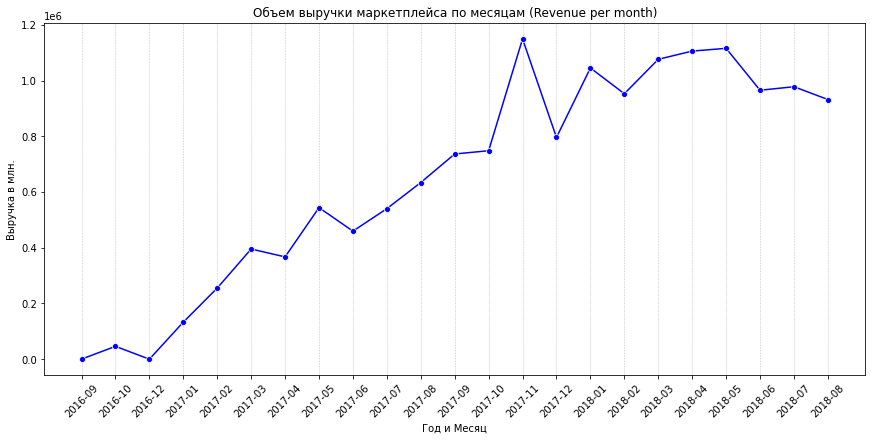

In [39]:
#Визуализируем метрику
fig = plt.figure(constrained_layout=True, figsize=(12, 6))
sns.lineplot(data=monthly_revenue, marker='o',
             color='blue')
plt.xticks(rotation=45)
plt.xlabel('Год и Месяц')
plt.title('Объем выручки маркетплейса по месяцам (Revenue per month)')
plt.ylabel('Выручка в млн.')
plt.grid(axis='x', linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.show()

2. Вычислим MAU

In [40]:
#Мерджим 2 датафрейма, оставляя уникальный айди пользователя и дату покупки.
mau_df = pd.merge(orders_copy, customers_copy, on ='customer_id') \
      [['customer_unique_id', 'order_year_month']]
#Аггрегируем данные по количеству уникальных юзеров в месяц MAU
mau_df = mau_df.groupby('order_year_month').agg({'customer_unique_id': 'nunique'}).rename(columns={'customer_unique_id': 'MAU'})

In [41]:
#Получаем MAU
mau_df

,MAU
order_year_month,
2016-09,4
2016-10,321
2016-12,1
2017-01,765
2017-02,1755
2017-03,2642
2017-04,2372
2017-05,3625
2017-06,3180


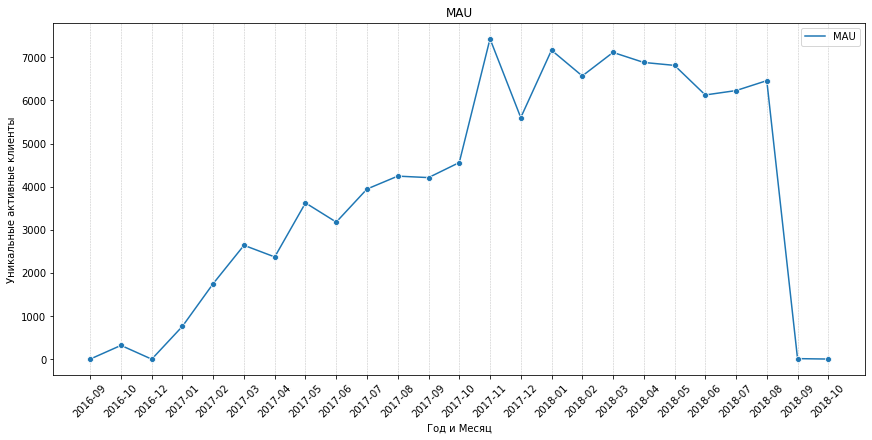

In [42]:
#Визуализируем метрику
fig = plt.figure(constrained_layout=True, figsize=(12, 6))
sns.lineplot(data=mau_df, marker='o',
             color='blue')
plt.xticks(rotation=45)
plt.xlabel('Год и Месяц')
plt.title('MAU')
plt.ylabel('Уникальные активные клиенты')
plt.grid(axis='x', linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.show()

3. Найдем количество новых клиентов (New Customers)

In [43]:
#Воспользуемся ранее созданным для когортного анализа датафреймом
#period_number_month=0.0 - это новые клиенты.
new_customers = cohorts_df.query('period_number_month == 0.0').reset_index()

In [44]:
new_customers['cohort'] = new_customers['cohort'].astype(str)

In [45]:
#Общее количество новых клиентов
new_customers['n_customers'].sum()

93358

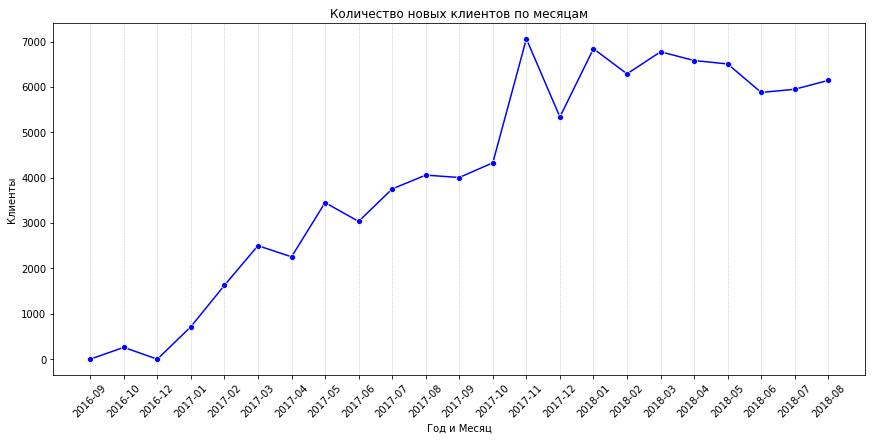

In [46]:
#Визуализируем метрику
fig = plt.figure(constrained_layout=True, figsize=(12, 6))
sns.lineplot(data=new_customers, x='cohort', y='n_customers', marker='o',
             color='blue')
plt.xticks(rotation=45)
plt.xlabel('Год и Месяц')
plt.title('Количество новых клиентов по месяцам')
plt.ylabel('Клиенты')
plt.grid(axis='x', linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.show()

4. Найдем среднее количество заказов на клиента. (AAPU)

In [47]:
#Делаем датафрейм где оставляем только уникальный айди пользователя и айди заказа
aapu_df = pd.merge(orders_copy, customers_copy, on ='customer_id') \
      [['customer_unique_id', 'order_id']]

In [48]:
#Аггрегируем по количеству заказов на каждого пользователя
aaup_df = aapu_df.groupby('customer_unique_id', as_index=False) \
                .agg({'order_id': 'count'}) \
                .rename(columns={'order_id': 'orders_count'})

In [49]:
aaup_df.head()

,customer_unique_id,orders_count
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [50]:
aaup_df.describe()

,orders_count
count,96096.000000
mean,1.034809
std,0.214384
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,17.000000


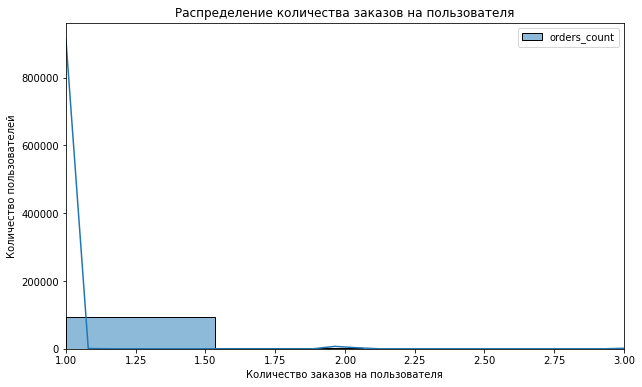

In [51]:
# Строим boxplot с распределением
plt.figure(figsize=(10, 6))
sns.histplot(aaup_df, kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Распределение количества заказов на пользователя')
plt.xlim(1, 3)
plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Количество пользователей')
plt.show()

In [52]:
# AAPU
print(f"Среднее количество заказов на клиента. (AAPU): {aaup_df.orders_count.mean().round(4)}")

Среднее количество заказов на клиента. (AAPU): 1.0348


5. Найдем среднюю выручку на клиента. (ARPU)

In [53]:
#Мерджим датафрейм с уник айди с тем, в котором мы считали total revenue, так как там есть уже столбец с месяцами
arpu_df = \
    pd.merge(customers[['customer_id','customer_unique_id']], \
             price_orders[['customer_id','order_year_month']], \
             on='customer_id', how='left')

In [54]:
#Считаем количество уникальных юзеров по месяцам
monthly_unuqie = arpu_df.groupby('order_year_month',)['customer_unique_id'].nunique()
monthly_unuqie.head()

order_year_month
2016-09       1
2016-10     262
2016-12       1
2017-01     718
2017-02    1630
Name: customer_unique_id, dtype: int64

In [55]:
#Cчитаем ARPU пом месяцам
arpu = monthly_revenue / monthly_unuqie
arpu.head()

order_year_month
2016-09    269.940000
2016-10    176.371947
2016-12     10.900000
2017-01    185.197758
2017-02    156.683092
dtype: float64

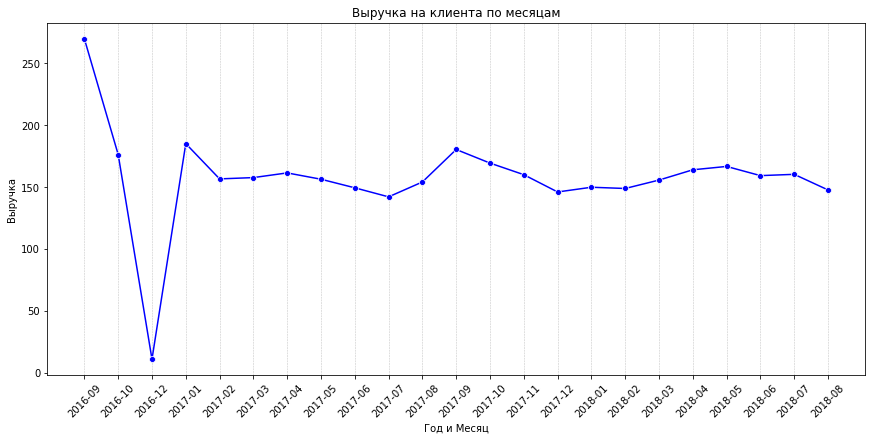

In [56]:
#Визуализируем метрику
fig = plt.figure(constrained_layout=True, figsize=(12, 6))
sns.lineplot(data=arpu, marker='o',
             color='blue')
plt.xticks(rotation=45)
plt.xlabel('Год и Месяц')
plt.title('Выручка на клиента по месяцам')
plt.ylabel('Выручка')
plt.grid(axis='x', linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.show()

In [57]:
#Вычисляем Средняя выручка на клиента. (ARPU)
print(f"Средняя выручка на клиента. (ARPU): {arpu.mean()}")

Средняя выручка на клиента. (ARPU): 157.80388261791649


# Задача 4. Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.
1. Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

**Impact - ?	 Confidence - 8	   Ease - 6**

2. Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. 

**Impact - ?	 Confidence - 10	  Ease - 4**

3. Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

**Impact - ?	 Confidence - 5	    Ease - 9**

P.S Для расчёта ***Impact*** возьмем данные с ***июня 2017 года***, а конверсия в повторный заказ равна величине медианного retention 1-го месяца - ***0.35%***

Impact	 Значение метрики

***1***    0 - 50

***2***	 51 - 150

***3***	 151 - 350

***4***	 351 - 750

***5***	 751 - 1550

***6***	 1551 - 3150

***7***	 3151 - 6350

***8***	 6351 - 12750

***9***	 12751 - 25550

***10***	 25551 - 51150


1. Приступим к вычислению ICE для гипотезы №1

In [58]:
# Напишем функцию, чтобы переводить полученный импакт в шкалу автоматически
def get_impact(value):
    impact_ranges = {
        1: (0, 50),
        2: (51, 150),
        3: (151, 350),
        4: (351, 750),
        5: (751, 1550),
        6: (1551, 3150),
        7: (3151, 6350),
        8: (6351, 12750),
        9: (12751, 25550),
        10: (25551, 51150)
    }

    for impact, (min_val, max_val) in impact_ranges.items():
        if min_val <= value <= max_val:
            return impact
    return None

In [59]:
# Напишем функцию которая выдает значение ICE
def ICE(a, b, c):
    return a * b * c

In [60]:
#Зададим переменные Confidence и Ease, retention rate
сonfidence_1, сonfidence_2, сonfidence_3 = 8, 10, 5
ease_1, ease_2, ease_3 = 6, 4, 9
retention_rate = 0.0035

In [61]:
# Сначала оставим данные только с июня 2017 года.
since_june = orders_copy[orders_copy['order_year_month'] >= '2017-06']

In [62]:
# Определим, сколько всего отмененных заказов
canceled_orders = since_june.query('order_status == "canceled" or order_status =="unavailable"')
print(f"Impact Гипотезы №1: {canceled_orders.shape[0]} заказа")

Impact Гипотезы №1: 974 заказа


"unavailable" - заказы отмененные по причине отсутствия товара можно относить к нашей гипотезе, так как баг в процессинге заказов может быть связан с этим, например из за бага не убираются товары с доступных к продаже

In [63]:
#Получаем значение Impact соотнеся ее с таблицей
impact_1 = get_impact(canceled_orders.shape[0])
print(f"Значение Impact по шкале: {impact_1}")

Значение Impact по шкале: 5


In [64]:
#Cчитаем значение ICE
ice_1 = ICE(impact_1, сonfidence_1, ease_1)
print(f"ICE Гипотезы №1: {ice_1}")

ICE Гипотезы №1: 240


2. Перейдем к вычислению ICE для гипотезы №2

In [65]:
# Мы уже ранее находили количество заказов доставленных вовремя (Yes) и с запаздыванием (No)
# Отсеем начиная с июня 2017 года
delivery_estimated = df[df['order_year_month'] >= '2017-06']
# Вычисляем количество запоздавших заказов
delayed_orders = delivery_estimated.query('delivery_estimated == "No"').shape[0]
# Вычисляем количество заказов
print(f"Количество запоздавших заказов: {delayed_orders}")

Количество запоздавших заказов: 7302


In [66]:
#Так как конверсия в повторный заказ равна retention rate
impact_2 = delayed_orders * retention_rate
print(f"Импакт Гипотезы №2: {round(impact_2)} заказов")

Импакт Гипотезы №2: 26 заказов


In [67]:
#Получаем значение Impact соотнеся ее с таблицей
impact_2 = get_impact(impact_2)
print(f"Значение Impact по шкале: {impact_2}")

Значение Impact по шкале: 1


In [68]:
#Cчитаем значение ICE
ice_2 = ICE(impact_2, сonfidence_2, ease_2)
print(f"ICE Гипотезы №2: {ice_2}")

ICE Гипотезы №2: 40


3. Перейдем к вычислению ICE для гипотезы №3

Для начала нужно определить какие статусы заказа нас интересуют, чтобы точней узнать количество заказов в которых у пользователя 
возникли трудности с процессом оплаты.

In [69]:
#Взглянем на все статусы
since_june.order_status.value_counts()

delivered      85413
shipped          912
canceled         499
unavailable      475
invoiced         240
processing       202
created            5
Name: order_status, dtype: int64

created — создан;

approved — подтверждён;

invoiced — выставлен счёт;

processing — в процессе сборки заказа;

shipped — отгружён со склада;

delivered — доставлен пользователю;

unavailable — заказ отменён по причине недоступности товара;;

canceled — отменён.

Для того, чтобы определить какой заказ был оплачен, а какой нет, взглянем на ***'order_approved_at'*** - время подтверждения оплаты заказа, в датасете orders

Если данные по ***'order_approved_at'*** отсутствуют (NaN), то значит заказ не был оплачен, что может указывать на то, что у пользователи случились проблемы в процессе оплаты заказа.

'shipped', 'delivered', 'processing' - отвергаем сразу, так как эти заказы прошли процесс оплаты.


***Узнаем подробней про 'unavailable', 'canceled', 'invoiced', 'created'***

In [70]:
# Ищем missing data 'unavailable'
since_june.query('order_status =="unavailable"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     475
order_delivered_customer_date    475
order_estimated_delivery_date      0
order_year_month                   0
dtype: int64

Отвергаем ***'unavailable'*** , так как все заказы прошли процесс оплаты

In [71]:
#Ищем missing data 'canceled'
since_june.query('order_status =="canceled"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                117
order_delivered_carrier_date     429
order_delivered_customer_date    498
order_estimated_delivery_date      0
order_year_month                   0
dtype: int64

Видим, что в ***'canceled'*** 117 из 499 заказов, которые не прошли процесс оплаты. Для дальнейших расчетов будем использовать эти 117 заказов

In [72]:
#Ищем missing data 'invoiced'
since_june.query('order_status =="invoiced"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     240
order_delivered_customer_date    240
order_estimated_delivery_date      0
order_year_month                   0
dtype: int64

Отвергаем ***'invoiced'***, так как все заказы прошли процесс оплаты.

In [73]:
#Ищем missing data 'created'
since_june.query('order_status =="created"').isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                5
order_delivered_carrier_date     5
order_delivered_customer_date    5
order_estimated_delivery_date    0
order_year_month                 0
dtype: int64

***'created'*** подходит, несмотря на то, что всего 5 заказов, все равно будем использовать их для наших расчетов

In [74]:
#Cчитаем Impact
impact_3 = since_june.query("order_status == 'canceled' or order_status == 'created'")['order_approved_at'].isna().sum()
print(f"Импакт Гипотезы №2: {impact_3} заказа")

Импакт Гипотезы №2: 122 заказа


In [75]:
#Cоотносим с таблицей
impact_3 = get_impact(impact_3)
print(f"Значение Impact по шкале: {impact_3}")

Значение Impact по шкале: 2


In [76]:
#Cчитаем значение ICE
ice_3 = ICE(impact_3, сonfidence_3, ease_3)
print(f"ICE Гипотезы №2: {ice_3}")

ICE Гипотезы №2: 90


In [77]:
print(f"ICE Гипотезы №1, №2, №3: {ice_1, ice_2, ice_3}")

ICE Гипотезы №1, №2, №3: (240, 40, 90)


**С помощью фреймворка ICE, мы выбрали гипотезу которая должна улучшить пользовательский опыт в маркетплейсе.***

***Это Гипотеза №1 - Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.***

# Задача 5. Сформулировать метрики, на которые должна повлиять выбранная вами гипотеза. 

Сформулировать хотя бы по одной метрике в категории: *целевые, прокси, guardrail.*

# Целевая Метрика: Количество доставленных заказов
Целевая метрика отражает основную цель гипотезы — увеличение количества доставленных заказов. 

После внедрения исправлений в процессинг заказов мы ожидаем уменьшение количества отмен, что приведёт к росту числа успешно доставленных заказов.


# Прокси-метрика: Количество отменённых заказов

Прокси-метрика измеряет количество отменённых заказов. Это косвенная метрика, которая помогает нам понять, насколько эффективно исправления в процессинге заказов устраняют причину отмен.

Ожидается, что после исправлений система больше не будет допускать технических ошибок, что приведет к снижению числа отменённых заказов. Это также поможет нам определить, в какой степени баги влияли на отмены в старой системе.


# Барьерная (guardrail) метрика: Среднее время обработки заказа
Барьерная метрика отслеживает время от подтверждения заказа до его доставки, что помогает гарантировать, что исправления в процессинге не привели к замедлению работы системы. 

В случае, если время обработки заказа увеличится, это может негативно повлиять на другие метрики.


# >Вывод

# ***Формализация проблемы продукта***

Продукт не удовлетворяет потребностям целевой аудитории

Исходя из данных полученных когортным анализом, мы выяснили что retention rate довольно низкий (ниже 1% по всем когортам)

    График общих продаж показывает, что они растут с каждым месяцем, что говорит о том, что приток новых клиентов большой, но они практически не совершают повторных покупок спустя месяцы.

    Низкий retention rate означает, что продукт либо не решает значимые проблемы целевой аудитории, либо не предоставляет достаточно ценности, чтобы удержать пользователей.

***Следовательно, делаем вывод о том, что у продукта отсутствует PMF (Product/Market Fit)***

Причины отсутствия PMF у данного маркетплейса могут быть разные:

1. Логистические проблемы (например, долгая доставка заказа)
2. Высокая конкуренция
3. Проблемы в оформлении заказа (например, баги, выбор способов оплаты или трудный процесс оформления заказа)
4. Разновидность и цена товаров
5. Плохой маркетинг

***Для выяснения точной причины, у нас недостаточно данных, нужны дополнительные исследования***

# *Маркетплейс должен сконцентрироваться на повышении retention rate (удержании клиентов)*

Для этого нужно:

1. Анализ потребностей конкретного сегмента аудитории.
2. Оптимизация пользовательского опыта. (например, исправление багов или сделать процесс покупки маскимально удобным и быстрым)
3. Улучшить качество продукции и разнообразие ассортимента.
4. Определить и реализовать стратегию по удержанию клиентов. (мотивировать клиентов совершать новые покупки)
5. Маркетинг.

# *Для данного продукта выделим 5 основным метрик на которые нужно скоцентрироваться, чтобы максимизировать прибыль компании*

1. Доход маркетплейса. (Revenue) - ***14.981.937$***

2. Количество уникальных активных пользователей в месяц. (MAU) - ***3921 - среднее значение***

3. Количество новых клиентов. (New Customers) - ***93358***

4. Среднее количество заказов на клиента. (AAPU) - ***1***

5. Средняя выручка на клиента. (ARPU) - ***158$***

# *Гипотеза которая должна улучшить пользовательский опыт в маркетплейсе.*
***Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.***

***С помощью фреймворка ICE, мы выбрали гипотезу которая должна улучшить пользовательский опыт в маркетплейсе.***

    Отмененные заказы - "canceled"

    "unavailable" - заказы отмененные по причине отсутствия товара можно относить к нашей гипотезе, так как баг в процессинге заказов может быть связан с этим, например из за бага не убираются товары с доступных к продаже

# *Метрики, на которые должна повлиять гипотеза*

Цель гипотезы: Исправление багов в системе процессинга заказов снизит количество отмен и повысит число доставленных заказов. Гипотеза предполагает, что исправления в процессинге заказов позволят клиентам легче завершать процесс покупки, а также сократить количество отмен, что в свою очередь приведет к увеличению количества доставленных заказов.

Для проверки гипотезы мы будем использовать A/B-тестирование с целью выявить изменения в ключевых метриках.

***Целевая Метрика: Количество доставленных заказов***

    Целевая метрика отражает основную цель гипотезы — увеличение количества доставленных заказов. 

    После внедрения исправлений в процессинг заказов мы ожидаем уменьшение количества отмен, что приведёт к росту числа успешно доставленных заказов.

    Доставленные заказы — это заказы, которые имеют статус "delivered".

    Мы будем отслеживать количество доставленных заказов в контрольной и тестовой группах до и после внедрения изменений. Это позволит оценить, увеличилось ли количество доставленных заказов в тестовой группе после исправлений.

    Увеличение числа доставленных заказов будет свидетельствовать о том, что исправления в процессинге заказов работают как предполагается.

    Важно учитывать возможные внешние факторы, которые могут повлиять на доставку, такие как логистические проблемы (например задержка доставки), которые не имеют отношения к исправлениям в процессинге.

***Прокси-метрика: Количество отменённых заказов***

    Прокси-метрика измеряет количество отменённых заказов. Это косвенная метрика, которая помогает нам понять, насколько эффективно исправления в процессинге заказов устраняют причину отмен.

    Ожидается, что после исправлений система больше не будет допускать технических ошибок, что приведет к снижению числа отменённых заказов. Это также поможет нам определить, в какой степени баги влияли на отмены в старой системе.

    Отменённые заказы — это заказы с состоянием "canceled" или "unavailable".

    Мы ожидаем снижения числа отменённых заказов в тестовой группе. Снижение отмен будет свидетельствовать о том, что исправления успешно устранили баги, которые приводили к отменам.

    Так же стоит обратить внимание на заказы с состоянием "unavailable", так как это заказы отмененные по причине недоступности товара, нужно определить влияние багов в системе процессинга на количество таких заказов, возможно в системе есть баг, который дает ложную информацию о наличии товара.

***Барьерная (guardrail) метрика: Среднее время обработки заказа***

    Барьерная метрика отслеживает время от подтверждения заказа до его доставки, что помогает гарантировать, что исправления в процессинге не привели к замедлению работы системы. В случае, если время обработки заказа увеличится, это может негативно повлиять на другие метрики.

    Мы будем отслеживать время от подтверждения заказа до его доставки в контрольной и тестовой группах

    В идеале время от подтверждения заказа до его доставки должно остаться на прежнем уровне или снизиться, если процессинг стал более быстрым благодаря исправлениям. Увеличение времени может стать сигналом для дополнительного анализа.

    Также время обработки заказа может зависеть от других факторов, таких как проблемы у логистической фирмы, сезонные колебания, которые мы видели на графиках, например в Ноябре 2017 Года, был зафиксирован обьем продаж, связанный с Чёрной Пятницей

# Общие выводы по итогам исследования:

    Низкий retention rate (менее 1%)
    Указывает на проблему с удержанием пользователей. Хотя число новых клиентов растет, большинство из них не возвращаются для совершения повторных покупок.

    Отсутствие Product/Market Fit (PMF)
    Из данных когортного анализа можно сделать вывод, что продукт не решает ключевых проблем целевой аудитории или не предоставляет достаточную ценность, чтобы мотивировать пользователей возвращаться.

    Проблемы с процессингом заказов
    Множество отменённых заказов может быть связано с багами в системе процессинга. Это негативно сказывается на пользовательском опыте и приводит к снижению числа доставленных заказов.

    Влияние внешних факторов
    Помимо багов в процессинге заказов, следует учитывать внешние проблемы, такие как логистические задержки, которые могут оказывать влияние на результаты. Высокая конкуренция на рынке, может являться затрудняющим фактором в освоении рынка.

# Рекомендации по продукту:

    Анализ потребностей аудитории
    Необходимо провести более глубокий анализ конкретных сегментов клиентов, чтобы лучше понять их потребности и предпочтения. Это позволит адаптировать продукт под их ожидания.

    Оптимизация процесса оформления заказа
    Решение проблем с процессингом заказов (исправление багов) должно стать приоритетом. Это улучшит пользовательский опыт и снизит количество отмен.

    Улучшение качества и ассортимента товаров
    Рекомендуется обратить внимание на ассортимент, чтобы он соответствовал потребностям целевой аудитории. Возможно, стоит пересмотреть ценообразование и разнообразие предлагаемых товаров.

    Проверка гипотезы с использованием A/B-тестирования
    Внедрение исправлений в процессинг заказов необходимо проверить через A/B-тестирование, чтобы подтвердить эффективность изменений в улучшении числа доставленных заказов и снижении количества отменённых заказов.

    Удержание клиентов
    Разработать стратегию по удержанию пользователей, например, с помощью персонализированных скидок, добавления рекомендательной системы, системы лояльности, улучшения пользовательского опыта, скорости обработки заказа.

**Эти меры помогут улучшить взаимодействие с пользователями, повысить retention rate и укрепить позицию маркетплейса на рынке**